## <font color='blue'> **Visualización y análisis exploratorio**

<font color='blue'> En este notebook implemento la fase Visualización de mi Trabajo de Fin de Grado. El primer paso para implemetar un clasificador de Spam con éxito es conocer los datos con los que estamos trabajando. Para ello nos vamos a apoyar en diversas técnicas de análisis de datos con el fin de identificar patrones, anomalías y características clave que puedan influir en el rendimiento del modelo de clasificación. Este análisis preliminar es crucial para diseñar estrategias de preprocesamiento de datos efectivas y posteriormente seleccionar las técnicas de modelado más adecuadas.

 ###  **Importar dataset**
 En primer lugar vamos a importar los tres archivos donde se encuentran nuestros datos. Cada uno posee una estructura distintas, por lo que tendremos que uniformizarlos.
A continuación combinaremos los tres datasets para formar nuestro corpus de correos spam.

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #Lista predeterminada de palabras vacías en inglés

In [142]:
'''
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
'''

"\n#Para acceder a nuestros ficheros de Google Drive\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [143]:
'''
dataFolder = 'drive/MyDrive/Colab Notebooks/datos_tfg/'
data1 = pd.read_csv(dataFolder + "/enronSpamSubset.csv")
data2 = pd.read_csv(dataFolder + "/lingSpam.csv")
data3 = pd.read_csv(dataFolder + "/completeSpamAssassin.csv")
'''

'\ndataFolder = \'drive/MyDrive/Colab Notebooks/datos_tfg/\'\ndata1 = pd.read_csv(dataFolder + "/enronSpamSubset.csv")\ndata2 = pd.read_csv(dataFolder + "/lingSpam.csv")\ndata3 = pd.read_csv(dataFolder + "/completeSpamAssassin.csv")\n'

In [144]:
#Para leer desde el pc
data1=pd.read_csv("./deteccion_spam/datos/enronSpamSubset.csv")
data2=pd.read_csv("./deteccion_spam/datos/lingSpam.csv")
data3=pd.read_csv("./deteccion_spam/datos/completeSpamAssassin.csv")

Vamos a llevar a cabo un análisis descriptivo del problema y un análisis exploratorio del dataset a nuestra disposición, con el fin de conocer mejor cómo se comportan nuestros datos.  

In [146]:
#INSTALAR PAQUETES
#!pip install wordcloud
#!pip install imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS #Lista predeterminada de palabras vacías en inglés
import string
import re  #Biblioteca para utilizar expresiones regulares
import nltk #Biblioteca para técnicas de PLN
from nltk.tokenize import word_tokenize
nltk.download('punkt') #Datos para tokenizar
from imblearn.over_sampling import RandomOverSampler
from nltk import bigrams, trigrams
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\monic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [147]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  10000 non-null  int64 
 1   Unnamed: 0    10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [148]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [149]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB


Como los datos provienen de tres fuentes distintas, tenemos que uniformizar su estructura para que tengan únicamente 2 columnas: el cuerpo del mensaje (Body) y su etiqueta (Label).

In [151]:
#Quitamos para cada dataset las columnas irrelevantes
data1.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data2.drop("Unnamed: 0",inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [152]:
print(data1.shape)
data1

(10000, 2)


,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1
...,...,...
9995,"Subject: monday 22 nd oct\n louise ,\n do you ...",0
9996,Subject: missing bloomberg deals\n stephanie -...,0
9997,Subject: eops salary survey questionnaire\n we...,0
9998,"Subject: q 3 comparison\n hi louise ,\n i have...",0


In [153]:
print(data2.shape)
data2.head()

(2605, 2)


,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [154]:
print(data3.shape)
data3.head()

(6046, 2)


,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


### **Limpieza y representación de los datos**

Para aplicar llevar a cabo un análisis preliminar del dataset y aplicar técnicas de visualización, no podemos tratar nuestros datos en crudo sino que necesitamos hacer una limpieza inicial de estos.

Dentro de este preprocesamiento inicial, vamos a aplicar las siguientes técnicas para limpiar y representar los datos textuales:
- **Eliminación de valores duplicados:** debemos limpiar nuestro dataset de instancias duplicadas, con la función `drop_duplicates`.
- **Eliminación valores nulos:** mediante una expresión regular para reemplazar cualquier cadena que contenga únicamente espacios en blanco por NaN. Posteriormente eliminaremos todas las instancias NaN con `dropna`.
- **Eliminar mayúsculas:** es importante pasar el texto a minúscula para que el clasificador no trate palabras que son iguales como distintas.
- **Identificar tokens:** podemos clasificar links y urls en los textos con tokens específicos. Identificamos las urls mediante una expresión regular y las sustituimos por el token 'URL'.
- **Eliminar signos de puntuación:** mediante un patron eliminamos términos que no sean alfanuméricos.
- **Eliminar stop words:** se trata de palabras muy comunes como preposiciones, conjunciones o determinantes, que tienen poca relevancia pero pueden confundir al clasificador.
  - Añadimos a la lista **términos específicos** como 'subject', que aparece en todos los correos y no aporta información al contexto.
- **Eliminamos términos con longitud menor que 2:** hemos observado que hay numerosos términos como números o letras sueltas que no aportan nada al texto, en todo caso pueden dificultar el análisis del dataset.
- **Tokenizar:** por último, tras haber limpiado nuestros datos, tokenizamos el texto para devolver una estructura de datos en forma de términos separados, con el que podamos hacer un análisis de la distribución de nuestro dataset. Con `word_tokenize` de `nltk` se devuelve una lista de listas (una lista para cada instancia).



In [157]:
def quitar_contracciones(texto):
    #Definimos un diccionario de contracciones y sus expansiones completas
    contracciones = {
        r"ain\'t": "am not",
        r"aren\'t": "are not",
        r"can\'t": "cannot",
        r"can\'t\'ve": "cannot have",
        r"\'cause": "because",
        r"could\'ve": "could have",
        r"couldn\'t": "could not",
        r"couldn\'t\'ve": "could not have",
        r"didn\'t": "did not",
        r"doesn\'t": "does not",
        r"don\'t": "do not",
        r"hadn\'t": "had not",
        r"hadn\'t\'ve": "had not have",
        r"hasn\'t": "has not",
        r"haven\'t": "have not",
        r"he\'d": "he had",
        r"he\'d\'ve": "he would have",
        r"he\'ll": "he will",
        r"he\'ll\'ve": "he will have",
        r"he\'s": "he is",
        r"how\'d": "how did",
        r"how\'d\'y": "how do you",
        r"how\'ll": "how will",
        r"how\'s": "how is",
        r"i\'d": "i had",
        r"i\'d\'ve": "i would have",
        r"i\'ll": "i will",
        r"i\'ll\'ve": "i will have",
        r"i\'m": "i am",
        r"i\'ve": "i have",
        r"isn\'t": "is not",
        r"it\'d": "it had",
        r"it\'d\'ve": "it would have",
        r"it\'ll": "it will",
        r"it\'ll\'ve": "it will have",
        r"it\'s": "it is",
        r"let\'s": "let us",
        r"ma\'am": "madam",
        r"mayn\'t": "may not",
        r"might\'ve": "might have",
        r"mightn\'t": "might not",
        r"mightn\'t\'ve": "might not have",
        r"must\'ve": "must have",
        r"mustn\'t": "must not",
        r"mustn\'t\'ve": "must not have",
        r"needn\'t": "need not",
        r"needn\'t\'ve": "need not have",
        r"o\'clock": "of the clock",
        r"oughtn\'t": "ought not",
        r"oughtn\'t\'ve": "ought not have",
        r"shan\'t": "shall not",
        r"sha\'n\'t": "shall not",
        r"shan\'t\'ve": "shall not have",
        r"she\'d": "she had",
        r"she\'d\'ve": "she would have",
        r"she\'ll": "she will",
        r"she\'ll\'ve": "she will have",
        r"she\'s": "she is",
        r"should\'ve": "should have",
        r"shouldn\'t": "should not",
        r"shouldn\'t\'ve": "should not have",
        r"so\'ve": "so have",
        r"so\'s": "so as",
        r"that\'d": "that would",
        r"that\'d\'ve": "that would have",
        r"that\'s": "that is",
        r"there\'d": "there had",
        r"there\'d\'ve": "there would have",
        r"there\'s": "there is",
        r"they\'d": "they had",
        r"they\'d\'ve": "they would have",
        r"they\'ll": "they will",
        r"they\'ll\'ve": "they will have",
        r"they\'re": "they are",
        r"they\'ve": "they have",
        r"to\'ve": "to have",
        r"wasn\'t": "was not",
        r"we\'d": "we had",
        r"we\'d\'ve": "we would have",
        r"we\'ll": "we will",
        r"we\'ll\'ve": "we will have",
        r"we\'re": "we are",
        r"we\'ve": "we have",
        r"weren\'t": "were not",
        r"what\'ll": "what will",
        r"what\'ll\'ve": "what will have",
        r"what\'re": "what are",
        r"what\'s": "what is",
        r"what\'ve": "what have",
        r"when\'s": "when is",
        r"when\'ve": "when have",
        r"where\'d": "where did",
        r"where\'s": "where is",
        r"where\'ve": "where have",
        r"who\'ll": "who will",
        r"who\'ll\'ve": "who will have",
        r"who\'s": "who is",
        r"who\'ve": "who have",
        r"why\'s": "why is",
        r"why\'ve": "why have",
        r"will\'ve": "will have",
        r"won\'t": "will not",
        r"won\'t\'ve": "will not have",
        r"would\'ve": "would have",
        r"wouldn\'t": "would not",
        r"wouldn\'t\'ve": "would not have",
        r"y\'all": "you all",
        r"y\'all\'d": "you all would",
        r"y\'all\'d\'ve": "you all would have",
        r"y\'all\'re": "you all are",
        r"y\'all\'ve": "you all have",
        r"you\'d": "you had",
        r"you\'d\'ve": "you would have",
        r"you\'ll": "you will",
        r"you\'ll\'ve": "you will have",
        r"you\'re": "you are",
        r"you\'ve": "you have"
    }

    #Sustituimos las contracciones en el texto
    for contraccion, expansion in contracciones.items():
        texto = re.sub(contraccion, expansion, texto)

    return texto

In [158]:
def limpieza(dataset):
    data = dataset.copy() #Creamos una copia explícita para evitar errores

    data.drop_duplicates(inplace=True)

    #Reemplazamos los espacios en blanco con NaN.
    #Usamos una expresión regular para reemplazar cualquier cadena que contenga únicamente espacios en blanco
    data['Body'] = data['Body'].replace(r'^\s*$', pd.NA, regex=True)

    # Eliminamos los correos con valores nulos
    data.dropna(subset=['Body'], inplace=True)

    # Quitamos mayúsculas
    data['Body'] = data['Body'].str.lower()

    # Reemplazamos las URLs por el token 'URL'
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    data['Body'] = data['Body'].apply(lambda x: re.sub(url_pattern, 'URL', x))

    #Antes de eliminar los signos de puntuación, eliminamos las contracciones del inglés para que no queden letras sueltas
    data['Body'] = data['Body'].apply(quitar_contracciones)

    # Eliminamos signos de puntuación
    data['Body'] = data['Body'].str.replace(f'[{string.punctuation}]', ' ', regex=True)

    # Eliminamos todos los elementos que no sean caracteres alfanuméricos
    #pattern = "[^a-zA-Z0-9]"
    pattern = "[^a-zA-Z ]"  # Espacio incluido para no eliminar los espacios entre palabras
    data['Body'] = data['Body'].apply(lambda x: re.sub(pattern, ' ', x))

    # Creamos una lista personalizada de palabras vacías
    stop_words_list = list(ENGLISH_STOP_WORDS)
    stop_words_list += ["subject"]

    # Eliminamos las stop words
    data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words_list]))

    # Eliminamos términos con longitud menor que 2
    data['Body'] = data['Body'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))

    return data

In [159]:
data1_clean=limpieza(data1)
data2_clean=limpieza(data2)
data3_clean=limpieza(data3)

In [160]:
data3_clean

,Body,Label
0,save life insurance spend life quote savings e...,1
1,fight risk cancer URL slim guaranteed lose lbs...,1
2,fight risk cancer URL slim guaranteed lose lbs...,1
3,adult club offers free membership instant acce...,1
4,thought like slim guaranteed lose lbs days URL...,1
...,...,...
6033,isilo tm palm os pocket pc windows enters beta...,0
6034,effector vol november ren eff orga publication...,0
6039,extended free seat sale thursday st november d...,0
6042,insignificant matters heavily overemphasised h...,0


A continuación concatenamos los tres Dataframes para cuando necesitemos aplicar técnicas de visualización a todo el conjunto de datos.

In [162]:
#Concatenar los tres dataframes
data_clean = pd.concat([data1_clean, data2_clean, data3_clean], ignore_index=True)

# Verificar la información del DataFrame
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17570 entries, 0 to 17569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    17570 non-null  object
 1   Label   17570 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 274.7+ KB
None


In [163]:
data_clean

,Body,Label
0,stock promo mover cwtd urgent investor trading...,1
1,listed major search engines submitting website...,1
2,important information thu jun important inform...,1
3,utf bask life utf individual incremen utf inte...,1
4,bidstogo places things hello privacy policy pe...,1
...,...,...
17565,isilo tm palm os pocket pc windows enters beta...,0
17566,effector vol november ren eff orga publication...,0
17567,extended free seat sale thursday st november d...,0
17568,insignificant matters heavily overemphasised h...,0


Hacemos la **tokenización** por separado, pues queremos dos conjuntos de datos para realizar nuestro análisis de datos: `data_clean` que contiene los datos limpios pero en forma de string, y `data_tokenized` que contiene los datos tokenizados en forma de lista de términos.

In [165]:
def tokenizar(dataset):
  data = dataset.copy()
  data['Body']=data['Body'].apply(lambda x: word_tokenize(x))

  return data

data_tokenized=tokenizar(data_clean)
data_tokenized

,Body,Label
0,"[stock, promo, mover, cwtd, urgent, investor, ...",1
1,"[listed, major, search, engines, submitting, w...",1
2,"[important, information, thu, jun, important, ...",1
3,"[utf, bask, life, utf, individual, incremen, u...",1
4,"[bidstogo, places, things, hello, privacy, pol...",1
...,...,...
17565,"[isilo, tm, palm, os, pocket, pc, windows, ent...",0
17566,"[effector, vol, november, ren, eff, orga, publ...",0
17567,"[extended, free, seat, sale, thursday, st, nov...",0
17568,"[insignificant, matters, heavily, overemphasis...",0


### **Análisis estadístico descriptivo**

En primer lugar realizamos un **análisis cuantitativo** de los correos en nuestro dataset. Para ello calculamos la longitud de cada instancia, en términos de número de caracteres, en número de palabras y número de oraciones.

A continuación se llama a la función `describe()` de `pandas`, que proporciona un resumen estadístico que incluye datos como la media aritmética de las longitudes, la desviación estándar, valores mínimo y máximo y los percentiles.

Esta información nos puede ayudar a entender rápidamente la distribución y la variabilidad de los datos, para identificar patrones y anomalías.

- **Número de caracteres** (`num_characters`): Se calcula la longitud de cada texto, es decir, el número total de caracteres que contiene. Para ello se usa la función `len`, que devuelve la longitud de una cadena en Python.

- **Número de palabras** (`num_words`): Para calcular el número de palabras en cada texto, se utiliza la función `word_tokenize` de NLTK, una biblioteca de procesamiento de lenguaje natural. Esta función divide el texto en palabras y signos de puntuación, y luego se cuenta el número de elementos resultantes.

- **Número de frases** (`num_sentence`): La función `sent_tokenize` también de NLTK se emplea para dividir el texto en oraciones.

In [168]:
data_clean['num_characters'] = data_clean['Body'].apply(len)
data_clean['num_words'] = data_clean['Body'].apply(lambda x: len(nltk.word_tokenize(x)))
data_clean['num_sentence'] = data_clean['Body'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [169]:
#Resumen estadístico para las instancias Ham
data_clean[data_clean['Label'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1.101000e+04,1.101000e+04,11010.000000
mean,2.137502e+03,2.835692e+02,0.999909
std,9.845182e+04,1.266699e+04,0.009530
min,0.000000e+00,0.000000e+00,0.000000
25%,2.550000e+02,3.700000e+01,1.000000
50%,5.570000e+02,8.000000e+01,1.000000
75%,1.213000e+03,1.660000e+02,1.000000
max,1.032724e+07,1.328682e+06,1.000000


In [170]:
#Resumen estadístico para las instancias Spam
data_clean[data_clean['Label'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,6560.000000,6560.000000,6560.000000
mean,1020.171646,138.982622,0.999543
std,2314.865636,310.563009,0.021382
min,0.000000,0.000000,0.000000
25%,234.000000,34.000000,1.000000
50%,440.000000,62.000000,1.000000
75%,979.250000,136.000000,1.000000
max,111115.000000,15132.000000,1.000000


En general podemos observar que los correos Spam no tienden a ser más largos, como podríamos pensar. Observamos que en ambos casos hay correos Spam con unas longitudes desorbitadas, los cuales podríamos considerar anomalías; sin embargo también hay correos Ham con grandes longitudes. Observamos además que las oraciones no se detectan bien, posiblemente debido a que hemos eliminado stops words y caracteres que no son alfanuméricos.

### **Desbalanceo de clases**
En la sección anterior hemos visto que existe un problema de desbalanceo de clases pues en general el número de correos es Spam es bastante menor al de correos Ham. Vamos a visualizar la distribución de las clases mediante histogramas.

In [173]:
#Función para visualizar la distribución de las clases (para ver si hay desbalanceo)
def distribucion(data, title):
    #Calculo la cantidad de correos electrónicos en cada clase
    class_distribution = data['Label'].value_counts()
    class_distribution = class_distribution.sort_index() #Simplemente para que la clase 0 aparezca primero

    # Visualizar la distribución de las clases
    plt.figure(figsize=(8, 6))
    class_distribution.plot(kind='bar', color= ['#45D2EB', '#FF5733'])
    plt.title(title)
    plt.xlabel('Clase')
    plt.ylabel('Cantidad de Correos Electrónicos')
    plt.xticks(rotation=0)
    plt.show()

    print(class_distribution)

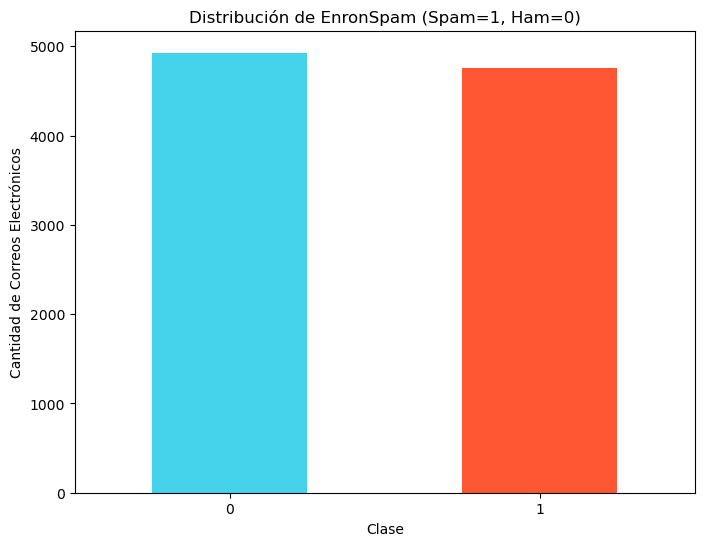

Label
0    4927
1    4760
Name: count, dtype: int64


In [174]:
distribucion(data1_clean, "Distribución de EnronSpam (Spam=1, Ham=0)")

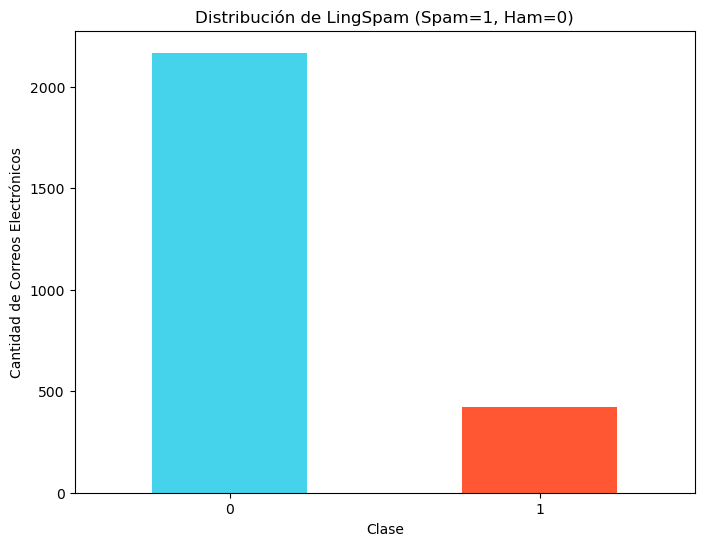

Label
0    2168
1     423
Name: count, dtype: int64


In [175]:
distribucion(data2_clean, "Distribución de LingSpam (Spam=1, Ham=0)")

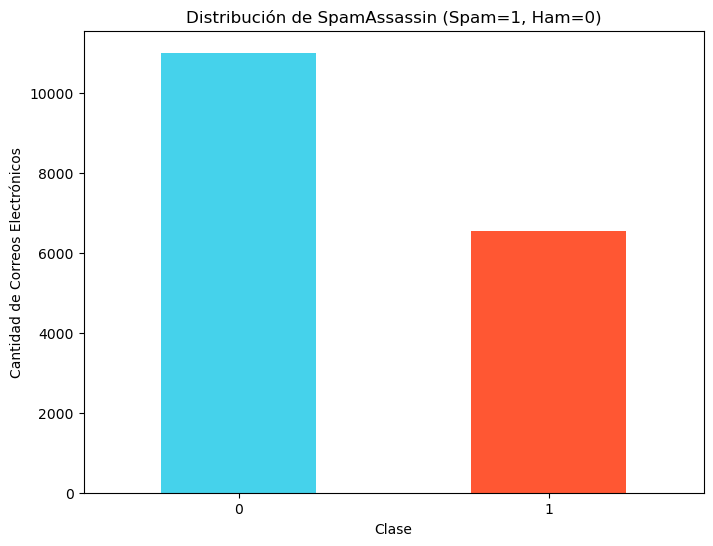

Label
0    11010
1     6560
Name: count, dtype: int64


In [176]:
distribucion(data_clean, "Distribución de SpamAssassin (Spam=1, Ham=0)")

Observamos que el primer dataset se encuentra bastante balanceado, mientras que los otros dos y sobretodo LingSpam está profundamente desbalanceado. Está claro que en la etapa de preprocesamiento tendremos que explorar qué técnica de balanceo de datos es más óptima para nuestro dataset.

Tras juntar los tres datasets, nos queda un corpus con las siguientes proporciones de Ham/Spam:

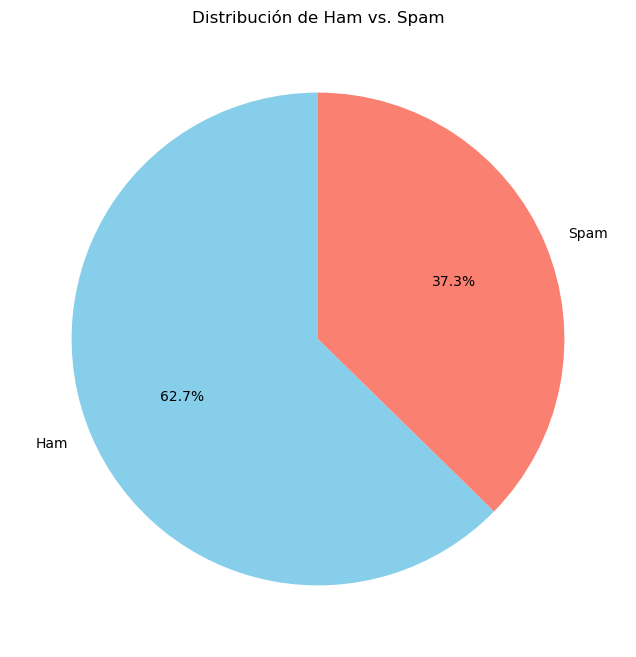

In [179]:
def pie_chart(data):
    #Calculamos los porcentajes de Spam y Ham
    spam_counts = data['Label'].value_counts(normalize=True)

    #Visualizamos los porcentajes en un gráfico circular (pie chart)
    plt.figure(figsize=(8, 8))
    plt.pie(spam_counts, labels=['Ham', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
    plt.title('Distribución de Ham vs. Spam')
    plt.show()

# Supongamos que data_clean es tu DataFrame y tiene una columna 'Label' que indica si cada correo es Spam (1) o Ham (0)
pie_chart(data_clean)

En efecto, el número de instancias Ham triplica el de Spam. Nos encontramos ante un problema de **desbalanceo de clases**, que puede mermar la eficiencia de los clasificadores. Los modelos entrenados con datos desbalanceados pueden desarrollar un sesgo hacia la clase más frecuente, lo que resulta en una precisión pobre al predecir la clase minoritaria. Por tanto necesitaremos aplicar una técnica de balanceo en la fase de Preprocesado.

### **Distribución de la longitud**
Tras analizar el resumen estadístico anterior, donde hemos visto que hay relación entre la longitud que tiene un correo y su clase, vamos a visualizar qué distribución sigue la variable `num_words`, mediante un histograma.

In [182]:
def distribucion_longitud(data, x, title):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    sns.histplot(data=data, x=x, hue="Label")
    plt.xlabel('Longitud del Correo Electrónico')
    plt.ylabel('Frecuencia')

    #Establecemos el límite superior del eje x como el valor máximo que se toma
    plt.xlim(0, data[x].quantile(0.98)) #quantile(0.98) para evitar extremos muy altos
    plt.legend(title="Labels", labels={"Spam":1, "Ham":0})
    plt.show()

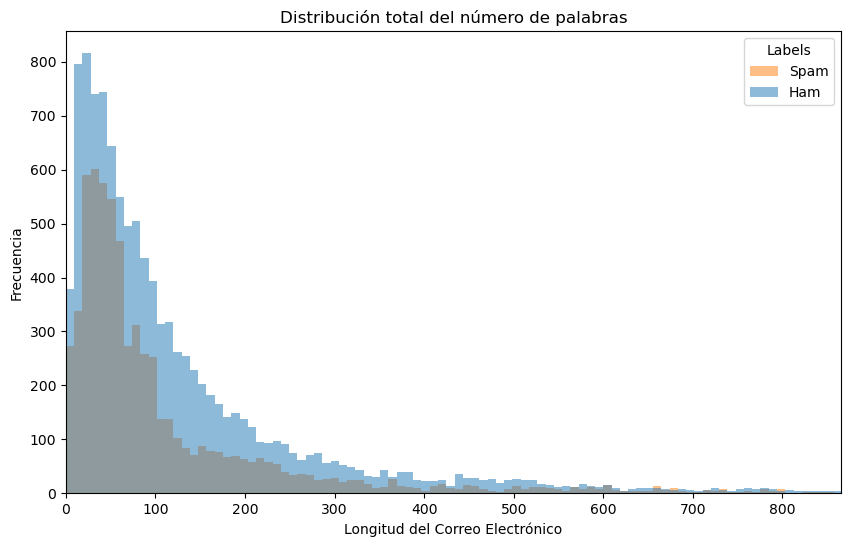

In [183]:
distribucion_longitud(data_clean, "num_words", "Distribución total del número de palabras") #Distribución del numero de palabras

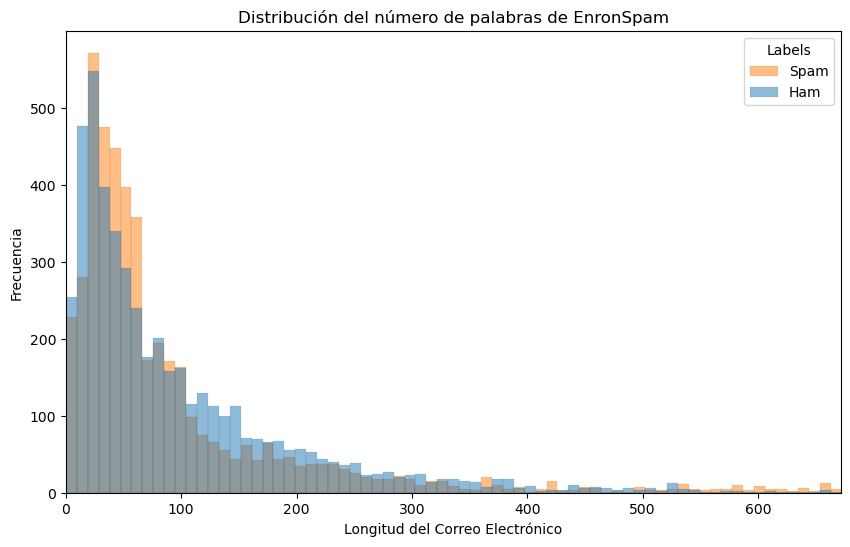

In [184]:
data1_clean['num_words'] = data1_clean['Body'].apply(lambda x: len(nltk.word_tokenize(x)))

distribucion_longitud(data1_clean, "num_words", "Distribución del número de palabras de EnronSpam") #Distribución del numero de palabras

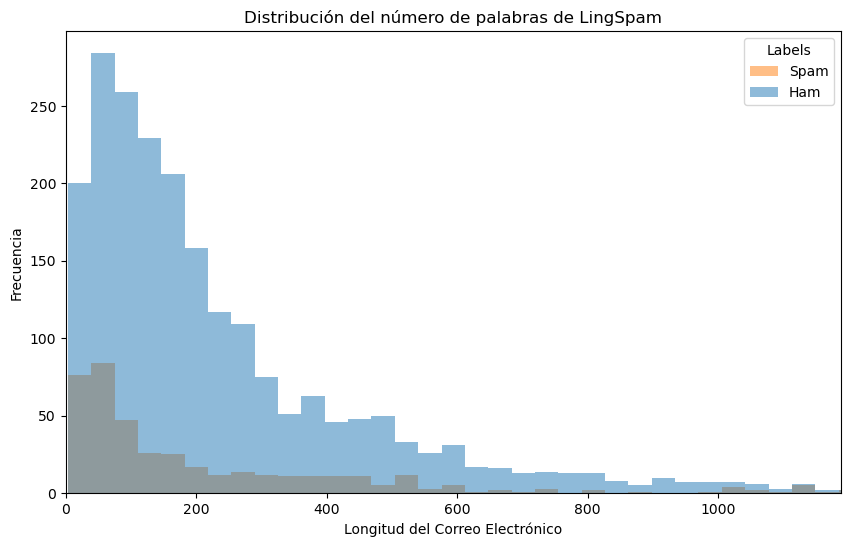

In [185]:
data2_clean['num_words'] = data2_clean['Body'].apply(lambda x: len(nltk.word_tokenize(x)))

distribucion_longitud(data2_clean, "num_words", "Distribución del número de palabras de LingSpam") #Distribución del numero de letras

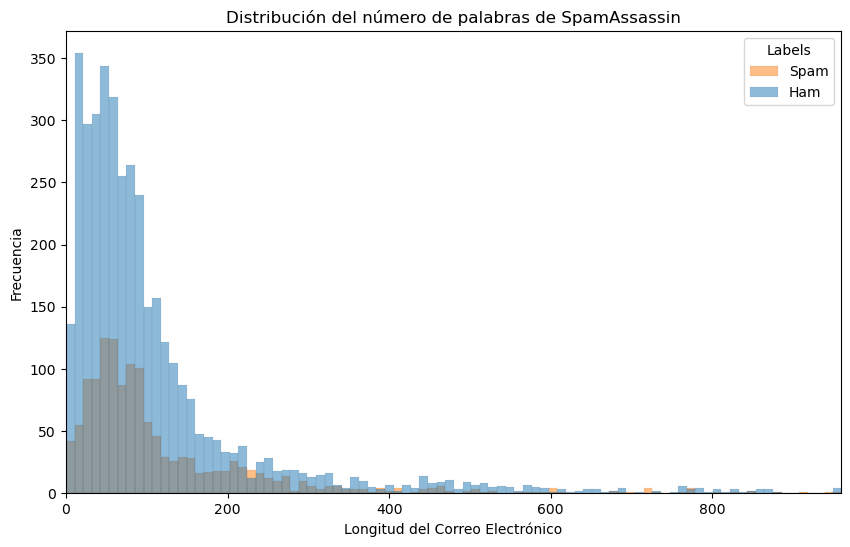

In [186]:
data3_clean['num_words'] = data3_clean['Body'].apply(lambda x: len(nltk.word_tokenize(x)))

distribucion_longitud(data3_clean, "num_words", "Distribución del número de palabras de SpamAssassin") #Distribución del numero de letras

Observamos que para el número de palabras, las distribuciones son similares para ambas clases. Hay que tener en cuenta que el conjunto de Spam es menor que el de Ham en dos de los datasets, pero su distribución es prácticamente igual. Los correos Spam suelen tener ligeramente mayor numero de palabras.

### **Distribucion de palabras o terminos**
Para hacer un análisis del contenido del dataset, vamos a visualizar en primer lugar un ***wordcloud* o nube de palabras**. Un *wordcloud* consiste en una representación gráfica de la frecuencia de las palabras en un texto. Las palabras más frecuentes aparecen con un tamaño mayor y más destacadas, mientras que las menos frecuentes son más pequeñas. Esta visualización ayuda a percibir rápidamente cuáles son los términos más predominantes en un texto.
Gracias a esta herramienta, podremos ver qué términos pueden ser determinantes a la hora de clasificar un mensaje como Spam o Ham. Las palabras que destacan en una nube de palabras de correos Spam pueden indicar patrones de lenguaje típicos de estos mensajes, como por ejemplo términos relacionados con ofertas, urgencia, o peligro. De manera similar, los términos más comunes en mensajes Ham pueden reflejar temas cotidianos, conversacionales o empresariales.

Además de lo anterior, un *wordcloud* puede servir como una herramienta de diagnóstico preliminar para ajustar la clasificación de texto. Por ejemplo, si algunas palabras irrelevantes aparecen frecuentemente en la imagen, sería indiciativo de que necesitamos ajustar los filtros de *stop words* o de refinar las técnicas de preprocesamiento.

In [189]:
def generate_wordcloud(datos, title):
    # Combinar todo el texto del DataFrame en una sola cadena
    text = " ".join(review for review in datos)

    #Crear el objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    #Si no quiero términos compuestos incluir collocations=False

    #Visualizar el WordCloud generado
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()


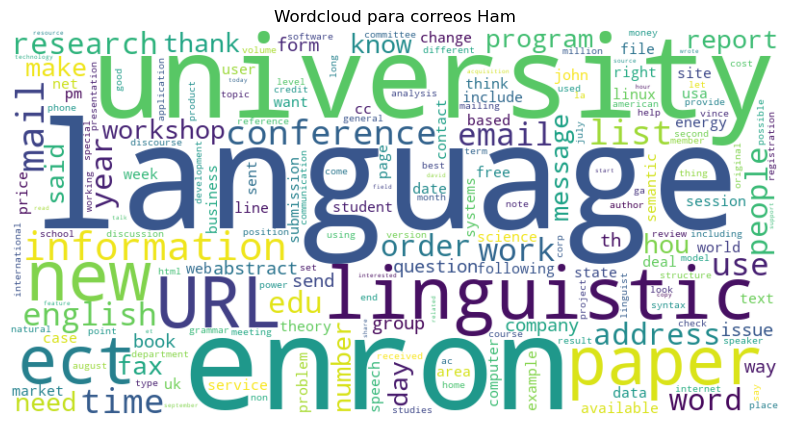

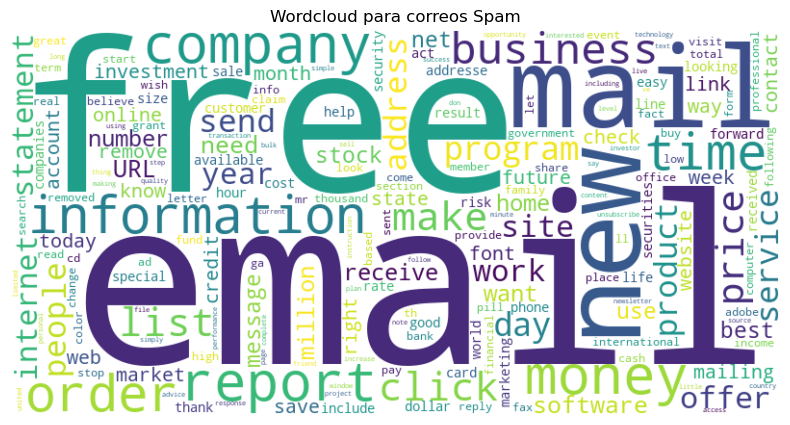

In [190]:

#Wordcloud para correos Ham
generate_wordcloud(data_clean[data_clean["Label"]==0]['Body'], 'Wordcloud para correos Ham')

#Wordcloud para correos Spam
generate_wordcloud(data_clean[data_clean["Label"]==1]['Body'], 'Wordcloud para correos Spam')

Los *wordclouds* generados muestran claramente algunas diferencias en los términos más frecuentes para cada tipo de correo.

- **En correos Ham (legítimos)**, algunas de las palabras más visibles son url, email, file, time, work, linux, y user. Esto sugiere que los correos son de temas relacionados con el trabajo y la tecnología. La presencia de términos más de nicho como "linux", indica que estos correos están relacionados con el mundo de la informática.

- **En correos Spam (no deseados)**, destacan términos como money, url, email, free, click, business y order. Esto refleja relación con el marketing y la publicidad. La palabra "free" es particularmente destacada, la cual es una táctica común en correos Spam para atraer la atención.

Hay términos como "URL" y "email" que aparecen con igual frecuencia en ambas clases. Los correos Spam suelen contener numerosos enlaces como parte de intentos de phishing o promociones. Sin embargo, en el entorno profesional y personal, es común incluir enlaces a documentos, recursos compartidos, artículos de interés, y otros contenidos relevantes. Por tanto habría que aprender a distinguir entre distintos tipos de URL para poder sacarles provecho. Por otro lado, la palabra "email" es redundante en este contexto por lo que es normal que aparezca tanto.

En general, hemos visto que los correos Spam utilizan un lenguaje que incluye términos de marketing y transacciones, mientras que los Ham tienden a incluir un vocabulario sobre la comunicación cotidiana y profesional. Esto puede ser utilizado para mejorar los filtros de spam y los algoritmos de clasificación.

Una idea clave es que podríamos utilizar estas diferencias en la frecuencia de palabras a la hora de entrenar modelos de clasificación. Algunas técnicas como TF-IDF pueden ser útiles aquí para ponderar las palabras en función de su importancia relativa en cada clase.


A continuación representamos un **diagrama de conteo de frecuencias** de palabras, para ver qué 10 términos son más comunes.

In [193]:
#Función para aplanar una lista de listas de palabras en una sola lista
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]


def generate_unigrams(data, n=10):
    #Aplanar la lista de tokens
    data_flat = flatten(data)

    #Contar la frecuencia de cada término
    data_frec = Counter(data_flat)

    #Convertir el contador en un DataFrame para fácil manipulación
    df = pd.DataFrame(data_frec.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)


    # Visualizamos los n términos más frecuentes usando un gráfico de barras
    top_words = df.head(n)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Word', data=top_words, palette='viridis')
    plt.title(f'Top {n} Most Frequent Unigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

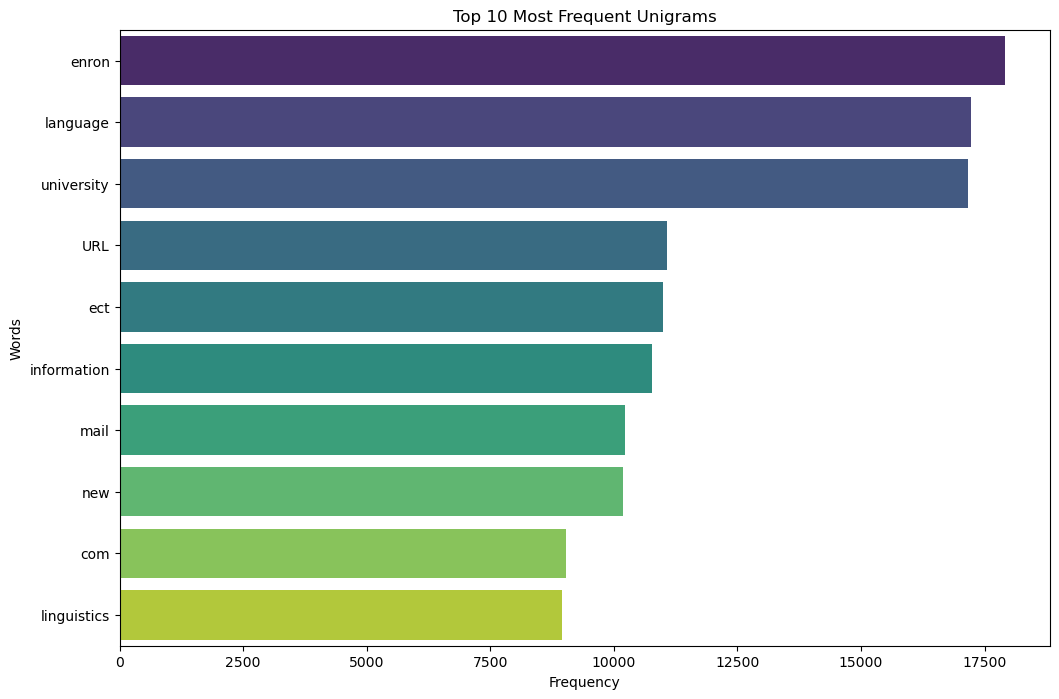

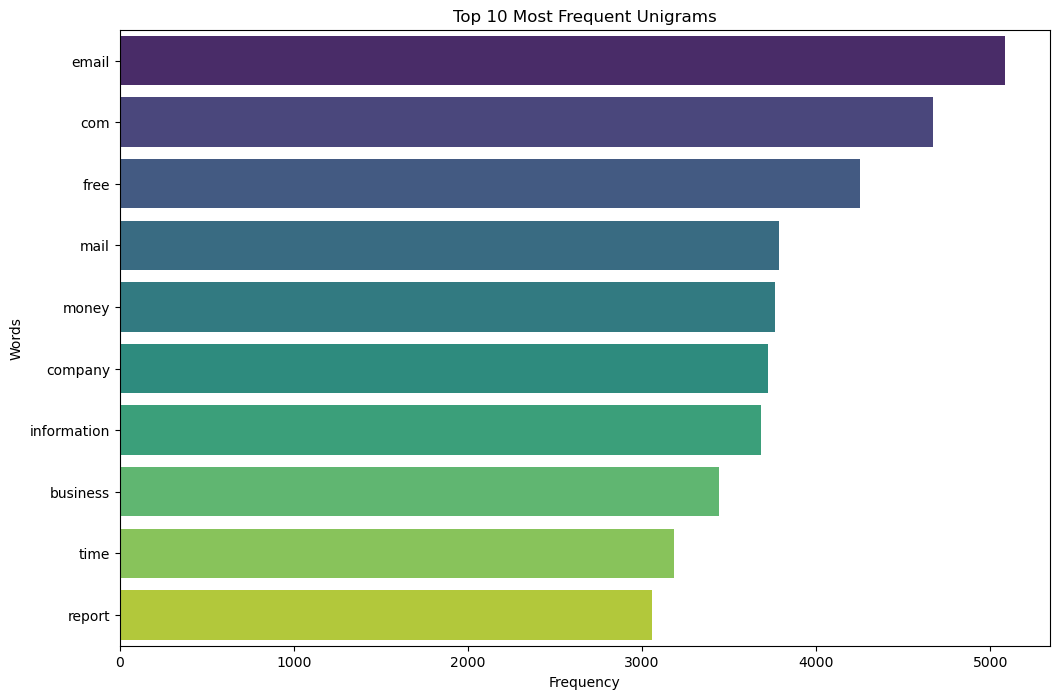

In [194]:


#Visualizar los 10 unigramas más frecuentes para Ham
generate_unigrams(data_tokenized[data_tokenized["Label"]==0]['Body'])
generate_unigrams(data_tokenized[data_tokenized["Label"]==1]['Body'])

Además de los diagramas de conteo de palabras individuales, puede ser interesante representar de varias palabras. Los **n-gramas** sirven para visualizar qué palabras tienden a aparecer inmediatamente después de otras. Por ejemplo, los bigramas son pares de palabras consecutivas, y los trigramas son tripletas. Estos pueden proporcionar *insights* adicionales que no siempre son capturables con la representación de unigramas, especialmente cuando estamos trabajando con textos, pues al estudiar las palabras de forma individual perdemos información sobre el contexto en el que se encuentran.

Para decidir si merece la pena tener en cuenta el contexto y el orden de palabras, vamos a representar varios *wordclouds* de bigramas y trigramas:

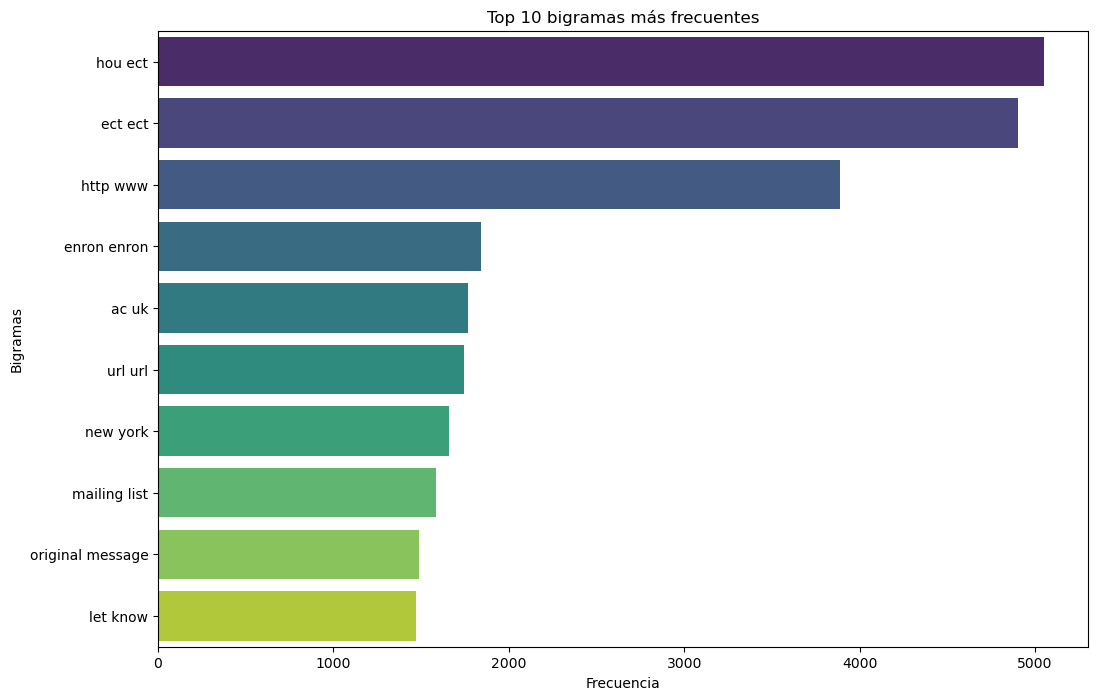

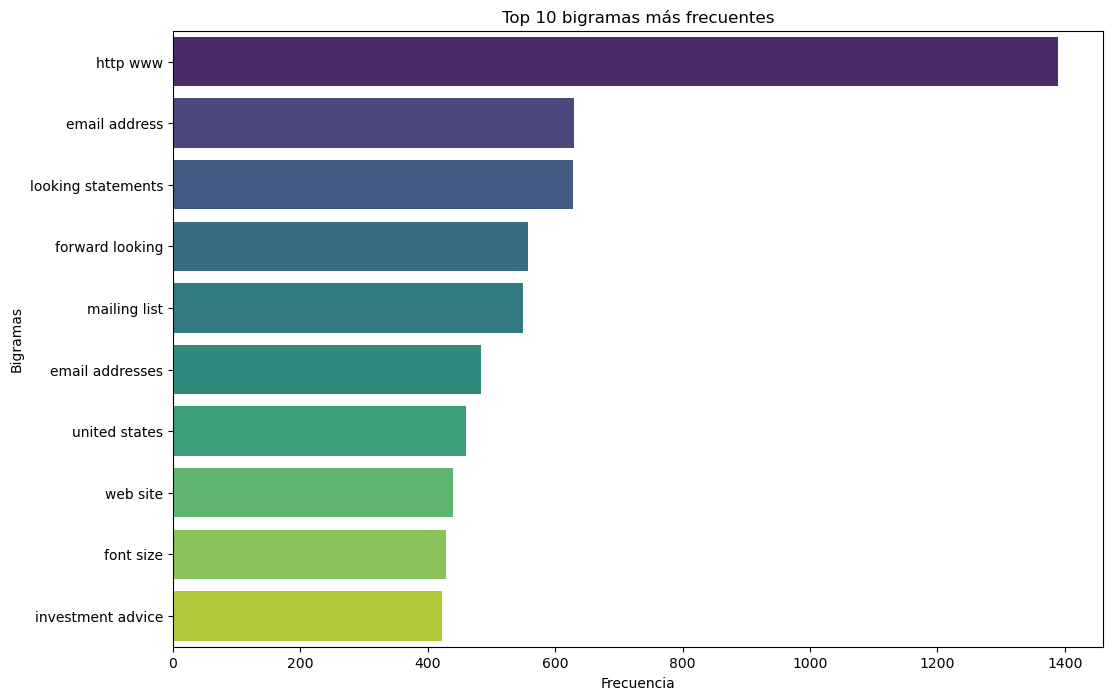

In [196]:
def generate_bigrams(data, n=10):
    #Concatenamos todos los textos en una sola cadena y tokenizamos
    text = ' '.join(data).lower()
    tokens = word_tokenize(text)

    #Genera y cuenta bigramas
    bi_tokens = bigrams(tokens)
    bi_freq = Counter(bi_tokens)

    #Creamos un dataFrame a partir del contador de bigramas y lo ordenamos según frecuencia
    bi_freq_df = pd.DataFrame(bi_freq.items(), columns=['Bigram', 'Frequency'])
    bi_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

    #Visualizo los 10 primeros bigramas
    top_bigrams = bi_freq_df.head(n)
    top_bigrams['Bigram'] = top_bigrams['Bigram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='viridis')
    plt.title(f'Top {n} bigramas más frecuentes')
    plt.xlabel('Frecuencia')
    plt.ylabel('Bigramas')
    plt.show()

generate_bigrams(data_clean[data_clean["Label"]==0]['Body'])
generate_bigrams(data_clean[data_clean["Label"]==1]['Body'])

Los correos Spam tienden a usar un lenguaje diseñado para engañar o incitar a la acción inmediata, como hacer clic en enlaces o solicitar información sensible ("click url", "credit card", "government grants"...).

En contraste, los correos Ham contienen términos más relacionados con la información, la administración y con la participación en comunidades("mailing list", "linux users").

Este análisis pone en manifiesto cómo los patrones de lenguaje en los bigramas pueden ser utilizados para diferenciar entre correos Spam y Ham. Sin embargo, al menos en este caso, no ha logrado proporcionar más información que la que ya proporcionan los unigramas.

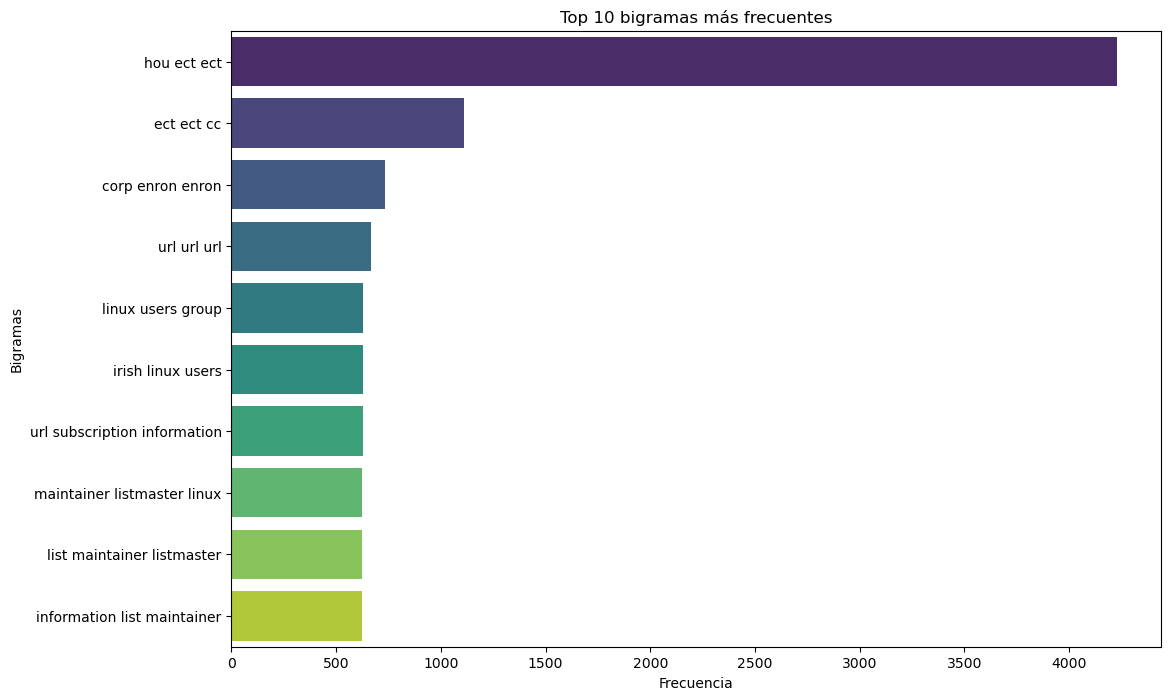

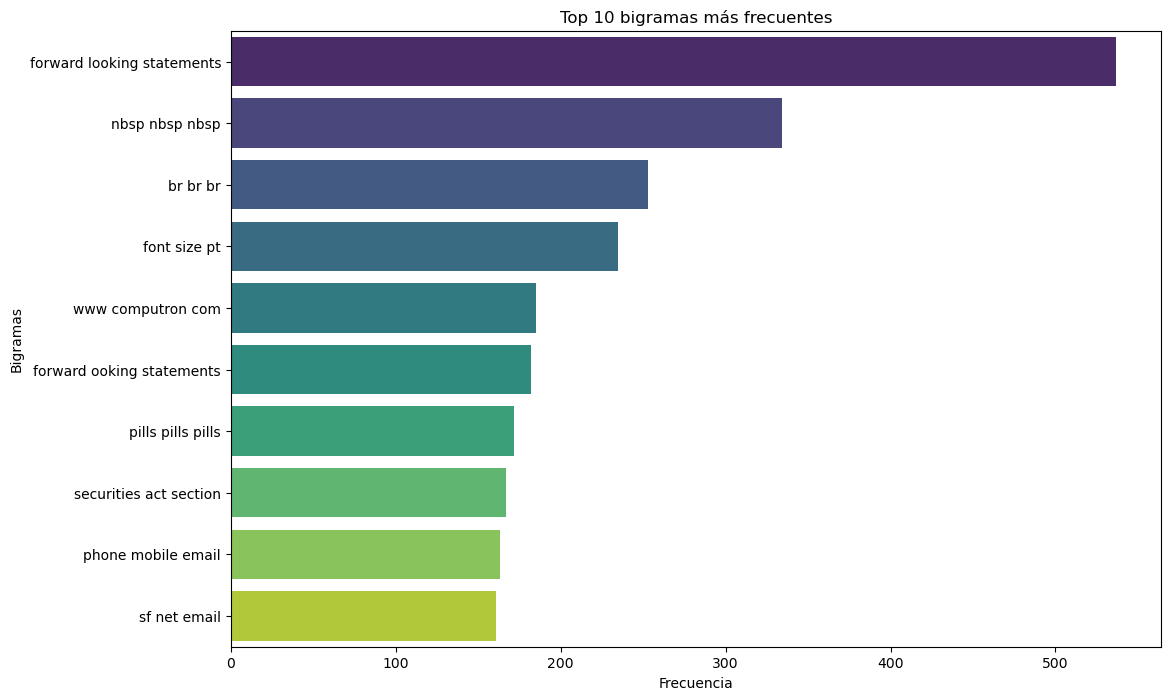

In [198]:
def generate_trigrams(data, n=10):
    #Concatenamos todos los textos en una sola cadena y tokenizamos
    text = ' '.join(data).lower()
    tokens = word_tokenize(text)

    #Genera y cuenta bigramas
    bi_tokens = trigrams(tokens)
    bi_freq = Counter(bi_tokens)

    #Creamos un dataFrame a partir del contador de bigramas y lo ordenamos según frecuencia
    bi_freq_df = pd.DataFrame(bi_freq.items(), columns=['Bigram', 'Frequency'])
    bi_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

    #Visualizo los 10 primeros bigramas
    top_bigrams = bi_freq_df.head(n)
    top_bigrams['Bigram'] = top_bigrams['Bigram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette='viridis')
    plt.title(f'Top {n} bigramas más frecuentes')
    plt.xlabel('Frecuencia')
    plt.ylabel('Bigramas')
    plt.show()

generate_trigrams(data_clean[data_clean["Label"]==0]['Body'])
generate_trigrams(data_clean[data_clean["Label"]==1]['Body'])


Para los trigramas, podemos observar que los conjuntos de palabras más comunes se degeneran y dejan de tener sentido. Destacan las tripletas con palabras repetidas e incluso algunas sin significado. Por tanto no vamos a profundizar más en el estudio de los trigramas.